### Imports

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Settings

In [ ]:
pd.options.display.max_columns = None

### Data

In [ ]:
passangers_data_train = pd.read_csv('train.csv')
passangers_data_test = pd.read_csv('test.csv')

### EDA

In [4]:
passangers_data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
passangers_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
passangers_data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [59]:
correlations = passangers_data_train.corr()

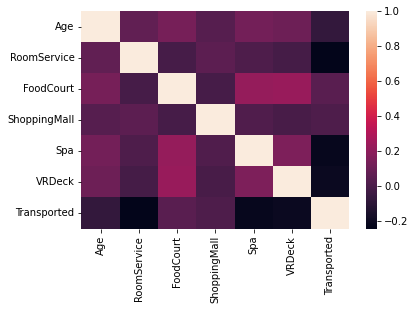

In [62]:
sns.heatmap(correlations)
plt.show()

---
### Feature engineering
---

In [13]:
passangers_data_train[['Cabin_1','Cabin_2','Cabin_3']] = passangers_data_train.Cabin.str.split("/", expand = True)

In [34]:
passangers_data_train[['Name_1','Name_2']] = passangers_data_train.Name.str.split(" ", expand = True)

In [37]:
passangers_data_train[['PassengerId_1','PassengerId_2']] = passangers_data_train.PassengerId.str.split("_", expand = True)

In [31]:
passangers_data_train[['Cabin','CryoSleep']]\
    .drop_duplicates()\
    .groupby(['Cabin'])['Cabin']\
    .filter(lambda x: x.count() > 1)

9          B/1/P
11         B/1/P
21         E/0/S
24         E/0/S
46        F/10/P
          ...   
8654    F/1888/P
8669     B/301/P
8670     B/301/P
8685      A/97/P
8687      A/97/P
Name: Cabin, Length: 1388, dtype: object

In [42]:
passangers_data_train[passangers_data_train['Cabin'] == 'B/1/P']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_1,Cabin_2,Cabin_3,Name_1,Name_2,PassengerId_1,PassengerId_2
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,B,1,P,Erraiam,Flatic,0008,01
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True,B,1,P,Altardr,Flatic,0008,02
11,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True,B,1,P,Wezena,Flatic,0008,03


In [54]:
passangers_data_train[passangers_data_train['VIP'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_1,Cabin_2,Cabin_3,Name_1,Name_2,PassengerId_1,PassengerId_2
38,0036_01,Earth,False,F/8/S,55 Cancri e,15.0,NaN,0.0,492.0,48.0,20.0,401.0,Marina Leodger,False,F,8,S,Marina,Leodger,0036,01
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,True,G,19,S,Oline,Handertiz,0108,03
145,0165_01,Mars,True,F/37/P,TRAPPIST-1e,35.0,NaN,0.0,0.0,0.0,0.0,0.0,Graven Anche,True,F,37,P,Graven,Anche,0165,01
228,0244_02,Mars,True,F/47/S,55 Cancri e,14.0,NaN,0.0,0.0,0.0,0.0,0.0,Tous Sad,True,F,47,S,Tous,Sad,0244,02
566,0593_01,Mars,False,D/24/P,TRAPPIST-1e,NaN,NaN,43.0,152.0,182.0,1.0,2005.0,Hon Kra,False,D,24,P,Hon,Kra,0593,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,9074_01,Earth,True,G/1460/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,NaN,0.0,0.0,Adamie Trerady,True,G,1460,S,Adamie,Trerady,9074,01
8512,9081_06,Earth,False,F/1858/P,PSO J318.5-22,16.0,NaN,0.0,0.0,761.0,0.0,0.0,Daryla Clemondsey,False,F,1858,P,Daryla,Clemondsey,9081,06
8542,9122_01,Earth,True,G/1469/S,55 Cancri e,55.0,NaN,0.0,0.0,0.0,0.0,0.0,Paulas Schmondez,False,G,1469,S,Paulas,Schmondez,9122,01
8630,9205_03,Europa,True,B/300/P,TRAPPIST-1e,52.0,NaN,0.0,0.0,0.0,0.0,0.0,Propent Brakeng,True,B,300,P,Propent,Brakeng,9205,03
